In [1]:
import numpy as np

In [39]:
with open("../data/answers/clostr_answer.txt") as f:
    s2 = [x[:-2] for x in f.readlines()]

strain2 = [[y for y in x.split("\t")[:] if len(y) > 0] for x in s2]

In [40]:
with open("../data/answers/Clostridium_1_3_q_10") as f:
    s1 = [x[:-2] for x in f.readlines()][::2]

strain1 = [[y[1:] for y in x.split(',')[:]] for x in s1]

In [41]:
strain1

[['C_009089_9',
  'CTAGAATTAGAACTCATTATTAAAACCATTCTTGCA',
  'TAATCTGACACATACAAAGTTGAACCTAGTGGTACG',
  'AAAAGCGTTCTTAAATCGTTACTTAACTCTTGCAAA',
  'TGGTATATCATACTCGTGCATTGCCTGCTCCACATT',
  'ATACAACCATATATTTACCAATTATGTACTTATGAA',
  'TTTTTTAACTTTTCAGTTCTCACAGGCGTTTCATC',
  'TTCATATTCCAAGCGTTTTGCTTACACTTAATAGAA',
  'AAAATTAAATTTCATGCTCTTAGACATACATATGCA',
  'TAGATTGCTTTCAAATTACCTCTTGTATAGCGTCT',
  'TTGCTCCGCTATGCCTTGCGCTCTCTAATATCGCTT',
  'TGAACTTTAATCGGTTTTATACAACAATATAACG',
  'TCACACATGAGCAATATCGAAACAGGCAAATCTACA',
  'TTCGTAAAATAACAATTATCTGGAATATGAGAAGTT',
  'CACTCTTAAGTTGTGACCTATCTGATATATGATTAA',
  'TCAATATCTATATTAAGTTTATTTTTAAAAACATC'],
 ['C_009089_3',
  'GTAGAGTCTTTATATGGTAGAGGTGGAATATATAAG',
  'AACTCTTCAATATCTCCTAATCGTTCAATATAATTC',
  'ACTGTATGCCATCTAAATGCATCATACAAACTTATT',
  'TATACTTCCTAATGCAATCAAATAAGTACCTAAAAT',
  'TTCGCAACTTATGATGGTGAAATGATTACATTAACA',
  'AATATAACAAAGTGGATGTTCTCTAAAAATAAAGA'],
 ['C_009089_7',
  'TAAAACCACTCAATTCTTAAAAGATACTGCAATTAT',
  'GGACATTTTAACCATAGACTATTTTACAA

In [30]:
def comp(s):
    s_comp = ''
    for c in s:
        if c == 'A':
            s_comp += 'T'
        elif c == 'C':
            s_comp += 'G'
        elif c == 'G':
            s_comp += 'C'
        elif c == 'T':
            s_comp += 'A'
        else:
            s_comp += c
    return s_comp[::-1]

In [31]:
len(strain1)

11

In [32]:
strain1_comp = strain1[:6] + [[comp(x) for x in y] for y in strain1[6:]]

In [33]:
strain1_comp

[['C_009089_9',
  'CTAGAATTAGAACTCATTATTAAAACCATTCTTGCA',
  'TAATCTGACACATACAAAGTTGAACCTAGTGGTACG',
  'AAAAGCGTTCTTAAATCGTTACTTAACTCTTGCAAA',
  'TGGTATATCATACTCGTGCATTGCCTGCTCCACATT',
  'ATACAACCATATATTTACCAATTATGTACTTATGAA',
  'TTTTTTAACTTTTCAGTTCTCACAGGCGTTTCATC',
  'TTCATATTCCAAGCGTTTTGCTTACACTTAATAGAA',
  'AAAATTAAATTTCATGCTCTTAGACATACATATGCA',
  'TAGATTGCTTTCAAATTACCTCTTGTATAGCGTCT',
  'TTGCTCCGCTATGCCTTGCGCTCTCTAATATCGCTT',
  'TGAACTTTAATCGGTTTTATACAACAATATAACG',
  'TCACACATGAGCAATATCGAAACAGGCAAATCTACA',
  'TTCGTAAAATAACAATTATCTGGAATATGAGAAGTT',
  'CACTCTTAAGTTGTGACCTATCTGATATATGATTAA',
  'TCAATATCTATATTAAGTTTATTTTTAAAAACATC'],
 ['C_009089_3',
  'GTAGAGTCTTTATATGGTAGAGGTGGAATATATAAG',
  'AACTCTTCAATATCTCCTAATCGTTCAATATAATTC',
  'ACTGTATGCCATCTAAATGCATCATACAAACTTATT',
  'TATACTTCCTAATGCAATCAAATAAGTACCTAAAAT',
  'TTCGCAACTTATGATGGTGAAATGATTACATTAACA',
  'AATATAACAAAGTGGATGTTCTCTAAAAATAAAGA'],
 ['C_009089_7',
  'TAAAACCACTCAATTCTTAAAAGATACTGCAATTAT',
  'GGACATTTTAACCATAGACTATTTTACAA

In [34]:
strain1_comp_f = [x[1:] for x in strain1_comp]

In [36]:
len(strain1_comp_f)

11

In [58]:
with open("../data/answers/Clo_009089.txt", 'w') as f:
    f.writelines([','.join(x)+"\n" for x in strain1_comp_f])/

In [41]:
strain2_f = [x[1:] for x in strain2]

In [59]:
with open("../data/answers/Clo_013316.txt", 'w') as f:
    f.writelines([','.join(x)+"\n" for x in strain2_f])

# True investigation

In [45]:
with open("../data/answers/Clo_013316.txt") as f:
    s1f = [x[:-2].split(",") for x in f.readlines()]

In [46]:
with open("../data/answers/Clo_009089.txt") as f:
    s2f = [x[:-2].split(",") for x in f.readlines()]

In [55]:
s1 = [x[1:] for x in s1f]
s2 = [x[1:] for x in s2f]

In [48]:
import networkx as nx
import matplotlib.pyplot as plt

In [49]:
import sys, os
import numpy as np

In [50]:
sys.path.append("/home/anton/BigMac/skoltech/CRISPR_research/notebooks/")

In [5]:
import utils.plot_utils as pu
import utils.hierarcical_utils as hu
import utils.hamiltonian_utils as hamu

In [6]:
from importlib import reload
hu = reload(hu)
hamu = reload(hamu)
pu = reload(pu)

In [7]:
import pickle
import numpy as np
import editdistance as ed

In [8]:
def search_best_alignment(a, b, t = 2):
    answ = ('', '')
    indexes = (-1,-1,-1,-1)
    b_index = -1
    
    for i, x in enumerate(b):
        curr_answ, curr_indexes = best_alignment(a, x, t)
        if len(curr_answ[0]) >= len(answ[0]) and len(curr_answ[1]) >= len(answ[1]):
            answ = curr_answ
            indexes = curr_indexes
            b_index = i
        curr_answ, curr_indexes = best_alignment(a[::-1], x, t)
        if len(curr_answ[0]) >= len(answ[0]) and len(curr_answ[1]) >= len(answ[1]):
            answ = curr_answ
            indexes = curr_indexes
            b_index = i
        
    return answ, b_index, indexes

In [9]:
def best_alignment(a, b, t):
    '''worst implementation of best alignment ever'''
    answ = ('','')
    i1a, i2a, j1a, j2a = -1,-1,-1,-1
    for i1 in range(0, len(a)):
        for i2 in range(i1 + 1, len(a) + 1):
            check_a = a[i1:i2]
            for j1 in range(0, len(b)):
                for j2 in range(j1 + 1,  len(b) + 1):
                    check_b = b[j1:j2]
                    if ed.eval(check_a, check_b) <= t and len(check_a) >= len(answ[0]) and len(check_b) >= len(answ[1]):
                        answ = (check_a, check_b)
                        i1a, i2a, j1a, j2a = i1,i2,j1,j2
    
    return answ, (i1a,i2a,j1a,j2a)


In [10]:
answ_110 = pickle.load(open("../data/clostr_res/110_nd", 'rb'))
answ_13 = pickle.load(open("../data/clostr_res/13_nd", 'rb'))

In [11]:
gr110 = np.load("../data/clostr_res/110.npy")
gr13 = np.load("../data/clostr_res/13.npy")

In [12]:
bars_110 = []
bars_13 = []
for item in answ_110.items():
    if item[1] > 100:
        bars_110.append(answ_110[item[0]])
        bars_13.append(answ_13[hu.find_closest(answ_13, item[0])[1]])
        #print(answ_110[item[0]], answ_13[hu.find_closest(answ_13, item[0])[1]])

<Container object of 100 artists>

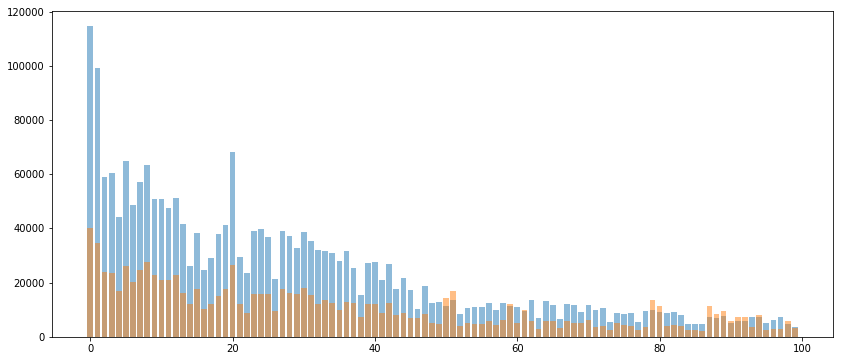

In [13]:
i,j = 0, 100
plt.figure(figsize=(14, 6))
plt.bar(np.arange(len(bars_110[i:j])), bars_110[i:j], alpha = 0.50)
plt.bar(np.arange(len(bars_13[i:j])), bars_13[i:j], alpha = 0.50)

In [14]:
arrays_110 = pickle.load(open("../data/clostr_res/arrays_110", 'rb'))
arrays_13 = pickle.load(open("../data/clostr_res/arrays_13", 'rb'))

In [15]:
n_to_cl_110 = pickle.load(open("../data/clostr_res/n_to_cl_13", 'rb'))
n_to_cl_13 = pickle.load(open("../data/clostr_res/n_to_cl_13", 'rb'))

In [16]:
cl_to_n_110 = pickle.load(open("../data/clostr_res/110_cl_to_n", 'rb'))
cl_to_n_13 = pickle.load(open("../data/clostr_res/13_cl_to_n", 'rb'))

In [56]:
cl1_13 = [[cl_to_n_13[hu.find_closest(cl_to_n_13, x)[1]] for x in y] for y in s1]
cl1_110 = [[cl_to_n_110[hu.find_closest(cl_to_n_110, x)[1]] for x in y] for y in s1]

In [57]:
cl2_13 = [[cl_to_n_13[hu.find_closest(cl_to_n_13, x)[1]] for x in y] for y in s2]
cl2_110 = [[cl_to_n_110[hu.find_closest(cl_to_n_110, x)[1]] for x in y] for y in s2]

In [62]:
def calc_weighs(gr, arrs):
    weights = []
    for arr in arrs:
        w = []
        for a, b in zip(arr, arr[1:]):
            w.append(gr[a][b])
        weights.append(w)

    return weights

In [71]:
weights_110 = calc_weighs(gr110, arrays_110)
weights_13 = calc_weighs(gr13, arrays_13)

In [114]:
def bars(arrays = None, alpha = 0.5,  *args):
    if arrays is None:
        to_plot = args
    else:
        try:
            arrays[0][0]
            to_plot = arrays
        except:
            to_plot = [arrays]
    for a in to_plot:
        plt.bar(np.arange(len(a)), a, alpha = alpha)
        

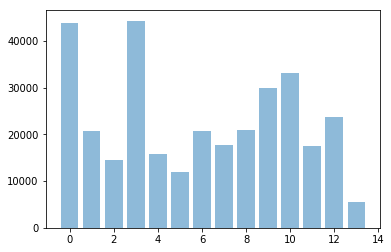

In [126]:
bars(weights_110[1])

In [99]:
bas110_2 = []
for arr in arrays_110:
    ba = search_best_alignment(arr, cl2_110)
    print(ba[1], len(ba[0][0]))
    bas110_2.append(ba)

8 17
0 15
7 6
6 3
1 11
4 14
8 3
5 6
3 13
2 8
1 3
8 2
8 2
8 2
8 2
8 2
8 2
8 2
8 2
8 2
8 2
8 2
8 2
8 2
8 2
8 2
8 2
8 2


In [110]:
gr110[cl2_110[8][10]].max()

85082.0

In [117]:
arrays_110[1]

[72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8]

In [118]:
cl2_110[0]

[72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8]

In [127]:
arrays_110[1][0]

72

In [130]:
n_to_cl_110[72]

'AAGCAACTATAGTAGAAGCAAAAGCGACAACAACTAAAG'

In [129]:
for arr in s1:
    for sp in arr:
        if ed.eval(n_to_cl_110[72], sp) < 10:
            print(sp)

AAGCAACTATAGTAGAAGCAAAAGCGACAACAACTAA


<Container object of 15 artists>

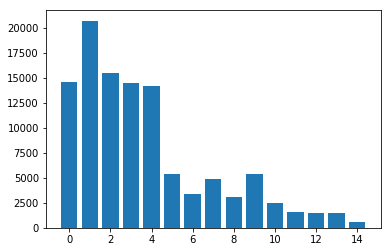

In [134]:
plt.bar(np.arange(15), [np.median(x) for x in weights_110][:15])

2 - 089